<a href="https://colab.research.google.com/github/tbeucler/2022_Intro_Python/blob/main/Exercises/W4_S1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Exercise: Multivariate Linear Regression**
What if our dataset has multiple dimensions and we want to find equations that looks something like this?
$$
y = w_1 x_1 + w_2 x_2 + w_3 x_3 + ... + b
$$

Here we show how we would do it with scikit-learn to find a linear equation that describes the Kaggle [Advertising dataset](https://www.kaggle.com/datasets/bumba5341/advertisingcsv?resource=download)

**Q1: Use pandas to import the advertising dataset**

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pooch
import urllib.request

In [15]:
myadvertising = pooch.retrieve('https://unils-my.sharepoint.com/:x:/g/personal/tom_beucler_unil_ch/EeqnI6nF9iBAkUOACbZ3mWUBDZ8N5mVP1oOaFd4vy6tIzw?download=1', 
                          known_hash='69104adc017e75d7019f61fe66ca2eb4ab014ee6f2a9b39b452943f209352010')

In [ ]:
import pandas

# Q1a: Use pandas to import the dataset
__ = pandas.__(_,_)
# Q1b: Display the first rows of the data with pandas
__.__()

In [16]:
#@title Answers
import pandas
# Import a dataset of advertising spends
advert = pandas.read_csv(myadvertising, index_col=0)

# Display the first five rows of the data
advert.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


**Q2: Try to use scikit-learn linear regression model to predict "Sales" from 
three columns "TV", "Radio", "Newspaper"**

This model will basically tell us how sales would change if we put resources to advertise products in three different medias.

In [ ]:
from sklearn.____ import ____

# Construct Input / Output matrices
Xall = __[[_,_,_]].values
y = _[].values
linreg = ___
linreg.__(_,_)

In [17]:
#@title Answer
from sklearn.linear_model import LinearRegression

Xall = advert[['TV', 'Radio', 'Newspaper']].values
y    = advert['Sales'].values

linreg = LinearRegression(); linreg.fit(Xall, y)

LinearRegression()

**Q3: Print out the linear equation coefficients and intercept**


In [ ]:
cfs = [round(x,_) for x in linreg.____]
print(f'Coefficients {cfs}, Intercept {linreg.____:5.2f}' )

In [18]:
#@title Answer
cfs = [round(x,4) for x in linreg.coef_]
print(f'Coefficients {cfs}, Intercept {linreg.intercept_:5.2f}' )

Coefficients [0.0458, 0.1885, -0.001], Intercept  2.94


### **Exercise: Clustering Penguin Dataset**

In the exercise, we will try to repeat the k-mean clustering procedure introuduced in the tutorial, but on a different 2D variable plane. 

Let's try "culmen_length_mm" and "Flipper_length_mm"?

<img style="padding: 10px; float:left;" alt="20 points and their Voronoi cells by Balu Ertl CC BY-SA 4.0" src="https://allisonhorst.github.io/palmerpenguins/reference/figures/culmen_depth.png" width="400">

In [2]:

penguinsize = pooch.retrieve('https://unils-my.sharepoint.com/:x:/g/personal/tom_beucler_unil_ch/ETfy8shC_PtBnsYren_f60UBSyn6Zz1CVvE0Z6_z575VZA?download=1', 
                          known_hash='aa728597b2228a2637e39c6f08e40a80971f4cdac7faf7bc21ff4481ee3e3ae9')

penguins = pd.read_csv(penguinsize)
print(penguins.head())

  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  


In [3]:
penguin_df = (penguins.dropna())

#####**Task1: Create an input dataset with the culmen_length_mm and flipper_length_mm data columns**

In [4]:
#X = np._____((penguin_df[__________],penguin_df[_____________]))._
X = np.vstack((penguin_df['culmen_length_mm'],penguin_df['flipper_length_mm'])).T

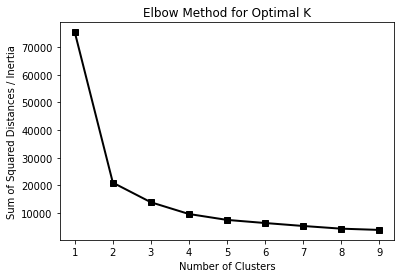

In [7]:
# Import KMeans fron scikit-learn
#from sklearn.________ import ______
from sklearn.cluster import KMeans
# Import Silhouette score fron scikit-learn
#from sklearn._______ import ________________
from sklearn.metrics import silhouette_score

Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(X)
 Sum_of_squared_distances.append(kmeans.inertia_)

plt.plot(K,Sum_of_squared_distances,marker='s',c='k',lw=2)
plt.xlabel('Number of Clusters') 
plt.ylabel('Sum of Squared Distances / Inertia') 
plt.title('Elbow Method for Optimal K')
plt.show()

##### **Task2: Perform KMeans clustering with 3 clusters**

In [8]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


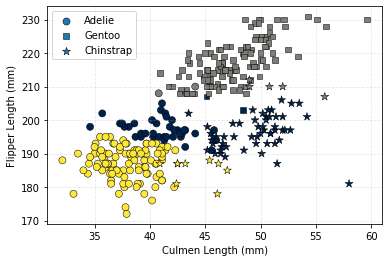

In [10]:
penguin_df['label'] = y_kmeans
plt.scatter(penguin_df[penguin_df['species']=='Adelie']['culmen_length_mm'], penguin_df[penguin_df['species']=='Adelie']['flipper_length_mm'],
            c=penguin_df[penguin_df['species']=='Adelie']['label'],
            s=50,marker='o',label='Adelie', cmap='cividis',edgecolors='k',linewidths=0.5,vmin=0,vmax=2)
plt.scatter(penguin_df[penguin_df['species']=='Gentoo']['culmen_length_mm'], penguin_df[penguin_df['species']=='Gentoo']['flipper_length_mm'],
            c=penguin_df[penguin_df['species']=='Gentoo']['label'],
            s=30,marker='s',label='Gentoo', cmap='cividis',edgecolors='k',linewidths=0.5,vmin=0,vmax=2)
plt.scatter(penguin_df[penguin_df['species']=='Chinstrap']['culmen_length_mm'], penguin_df[penguin_df['species']=='Chinstrap']['flipper_length_mm'],
            c=penguin_df[penguin_df['species']=='Chinstrap']['label'],
            s=70,marker='*',label='Chinstrap', cmap='cividis',edgecolors='k',linewidths=0.5,vmin=0,vmax=2)
plt.grid(linestyle='--',alpha=0.3)
plt.ylabel('Flipper Length (mm)')
plt.xlabel('Culmen Length (mm)')
plt.legend()
plt.show()

In [11]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


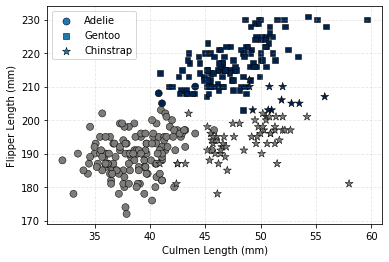

In [12]:
penguin_df['label2'] = y_kmeans
plt.scatter(penguin_df[penguin_df['species']=='Adelie']['culmen_length_mm'], penguin_df[penguin_df['species']=='Adelie']['flipper_length_mm'],
            c=penguin_df[penguin_df['species']=='Adelie']['label2'],
            s=50,marker='o',label='Adelie', cmap='cividis',edgecolors='k',linewidths=0.5,vmin=0,vmax=2)
plt.scatter(penguin_df[penguin_df['species']=='Gentoo']['culmen_length_mm'], penguin_df[penguin_df['species']=='Gentoo']['flipper_length_mm'],
            c=penguin_df[penguin_df['species']=='Gentoo']['label2'],
            s=30,marker='s',label='Gentoo', cmap='cividis',edgecolors='k',linewidths=0.5,vmin=0,vmax=2)
plt.scatter(penguin_df[penguin_df['species']=='Chinstrap']['culmen_length_mm'], penguin_df[penguin_df['species']=='Chinstrap']['flipper_length_mm'],
            c=penguin_df[penguin_df['species']=='Chinstrap']['label2'],
            s=70,marker='*',label='Chinstrap', cmap='cividis',edgecolors='k',linewidths=0.5,vmin=0,vmax=2)
plt.grid(linestyle='--',alpha=0.3)
plt.ylabel('Flipper Length (mm)')
plt.xlabel('Culmen Length (mm)')
plt.legend()
plt.show()